<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

print('shape df train:',df_train.shape)
print('shape df test:',df_test.shape)
print('shape df full:',df_full.shape)

display(df_train.info())
display(df_test.info())
display(df_full.info())


shape df train: (16860, 87)
shape df test: (5856, 53)
shape df full: (22716, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

Колонок в таблице впечатляще много,  почти везде имеются пропуски. Почти все колонки имеют тип float. Даты приведем к соотвествующему формату.

Посмотрим на данные по эффективности обогащения, с которыми нужно сравнить расчеты, и данные столбцов, по которым расчеты будут производиться.  

In [2]:
display(df_train[['rougher.output.recovery', 'rougher.output.tail_au', 'rougher.output.concentrate_au', 'rougher.input.feed_au']])

,rougher.output.recovery,rougher.output.tail_au,rougher.output.concentrate_au,rougher.input.feed_au
0,87.107763,1.170244,19.793808,6.486150
1,86.843261,1.184827,20.050975,6.478583
2,86.842308,1.162562,19.737170,6.362222
3,87.226430,1.079755,19.320810,6.118189
4,86.688794,1.012642,19.216101,5.663707
...,...,...,...,...
16855,89.574376,0.748633,18.603550,5.335862
16856,87.724007,0.771582,18.441436,4.838619
16857,88.890579,0.685059,15.111231,4.525061
16858,89.858126,0.567130,17.834772,4.362781


In [3]:
df_train['rougher.output.recovery_synth'] = (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] -df_train['rougher.output.tail_au']))/ \
(df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100
print(df_train[['rougher.output.recovery_synth', 'rougher.output.recovery']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
rougher.output.recovery_synth    14577 non-null float64
rougher.output.recovery          14287 non-null float64
dtypes: float64(2)
memory usage: 263.6 KB
None


В расчитанном вручную столбце оказалось немного больше значений, при расчете MAE удалим всё лишнее.

In [4]:
series_test = pd.Series(abs(df_train['rougher.output.recovery_synth']- df_train['rougher.output.recovery']))
series_test.dropna(inplace=True)
print(series_test.sum()/len(series_test))

9.444891926100695e-15


Можно уверенно говорить о верном расчете столбца rougher.output.recovery, ошибка с расчитанным вручную столбцом получилась в пределах погрешности.

В тестовой выборке отсутствуют 33 столбца, имеющиеся в тренировочной и полной выборках. В частности, нет данных с финальными характеристиками ([final..]), а также параметров продукта после флотации, а также первичной и вторичной очистки ([rougher.output.], [primary_cleaner.output.],[secondary_cleaner.output.]). На этапе вторичной очистки нет входных параметров сырья ([secondary_cleaner.input.]).

В датафреймах приведем даты к соответствующему формату.

In [5]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
print(df_full['date'])

0       2016-01-15 00:00:00
1       2016-01-15 01:00:00
2       2016-01-15 02:00:00
3       2016-01-15 03:00:00
4       2016-01-15 04:00:00
                ...        
22711   2018-08-18 06:59:59
22712   2018-08-18 07:59:59
22713   2018-08-18 08:59:59
22714   2018-08-18 09:59:59
22715   2018-08-18 10:59:59
Name: date, Length: 22716, dtype: datetime64[ns]


## Анализ данных

На полной выборке отследим изменение концентрации металлов.

In [6]:
au_concent = df_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
ag_concent = df_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
pb_concent = df_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

print('Концентрация золота: \n',
      'После флотации:', "{:.2f}".format(au_concent['rougher.output.concentrate_au'].mean()), 
      '\n После первичой очистки', "{:.2f}".format(au_concent['primary_cleaner.output.concentrate_au'].mean()), 
      '\n Изменение по сравнению с предыдущей стадией:', 
      "{:.2%}".format((au_concent['primary_cleaner.output.concentrate_au'].mean() / au_concent['rougher.output.concentrate_au'].mean() - 1)),
      '\n После вторичной очистки',"{:.2f}".format(au_concent['final.output.concentrate_au'].mean()),
     '\n Изменение по сравнению с предыдущей стадией:', 
      "{:.2%}".format((au_concent['final.output.concentrate_au'].mean() /au_concent['primary_cleaner.output.concentrate_au'].mean() - 1)),'\n'
     )

print('Концентрация серебра: \n',
      'После флотации:', "{:.2f}".format(ag_concent['rougher.output.concentrate_ag'].mean()), 
      '\n После первичой очистки', "{:.2f}".format(ag_concent['primary_cleaner.output.concentrate_ag'].mean()), 
      '\n Изменение по сравнению с предыдущей стадией:', 
      "{:.2%}".format((ag_concent['primary_cleaner.output.concentrate_ag'].mean() / ag_concent['rougher.output.concentrate_ag'].mean() - 1)),
      '\n После вторичной очистки',"{:.2f}".format(ag_concent['final.output.concentrate_ag'].mean()),
     '\n Изменение по сравнению с предыдущей стадией:', 
      "{:.2%}".format((ag_concent['final.output.concentrate_ag'].mean() /ag_concent['primary_cleaner.output.concentrate_ag'].mean() - 1)), '\n'
     )

print('Концентрация свинца: \n',
      'После флотации:', "{:.2f}".format(pb_concent['rougher.output.concentrate_pb'].mean()), 
      '\n После первичой очистки', "{:.2f}".format(pb_concent['primary_cleaner.output.concentrate_pb'].mean()), 
      '\n Изменение по сравнению с предыдущей стадией:', 
      "{:.2%}".format((pb_concent['primary_cleaner.output.concentrate_pb'].mean() / pb_concent['rougher.output.concentrate_pb'].mean() - 1)),
      '\n После вторичной очистки',"{:.2f}".format(pb_concent['final.output.concentrate_pb'].mean()),
     '\n Изменение по сравнению с предыдущей стадией:', 
      "{:.2%}".format((pb_concent['final.output.concentrate_pb'].mean() /pb_concent['primary_cleaner.output.concentrate_pb'].mean() - 1)),'\n'
     )


Концентрация золота: 
 После флотации: 17.88 
 После первичой очистки 29.21 
 Изменение по сравнению с предыдущей стадией: 63.38% 
 После вторичной очистки 40.00 
 Изменение по сравнению с предыдущей стадией: 36.93% 

Концентрация серебра: 
 После флотации: 10.87 
 После первичой очистки 7.69 
 Изменение по сравнению с предыдущей стадией: -29.27% 
 После вторичной очистки 4.78 
 Изменение по сравнению с предыдущей стадией: -37.83% 

Концентрация свинца: 
 После флотации: 6.90 
 После первичой очистки 8.92 
 Изменение по сравнению с предыдущей стадией: 29.28% 
 После вторичной очистки 9.10 
 Изменение по сравнению с предыдущей стадией: 1.95% 



У золота и свинца концентрация с течением очистки растёт: у золота разница в концентрации после флотации и после вторичной очистки более чем в два раза, а у свинца около 30%. Интересно, что при этом концентрация серебра по мере очистки падает. За все стадии более чем в два раза.

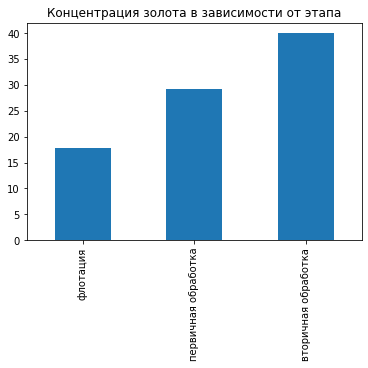

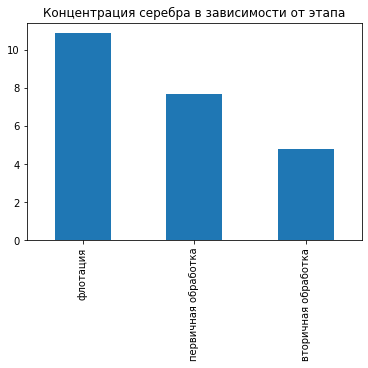

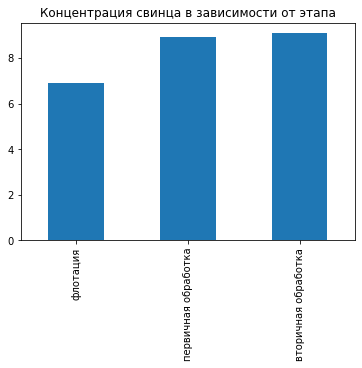

In [7]:
bar1 = plt.figure()
au_concent.columns = ['флотация', 'первичная обработка', 'вторичная обработка']
bar1 = au_concent.mean().plot(kind ='bar',title = 'Концентрация золота в зависимости от этапа')

bar2 = plt.figure()
ag_concent.columns = ['флотация', 'первичная обработка', 'вторичная обработка']
bar2 = ag_concent.mean().plot(kind ='bar',title = 'Концентрация серебра в зависимости от этапа')

bar3 = plt.figure()
pb_concent.columns = ['флотация', 'первичная обработка', 'вторичная обработка']
bar3 = pb_concent.mean().plot(kind ='bar',title = 'Концентрация свинца в зависимости от этапа')


Сравним распределения оценок гранул сырья на обучающей и тестовой выборках.

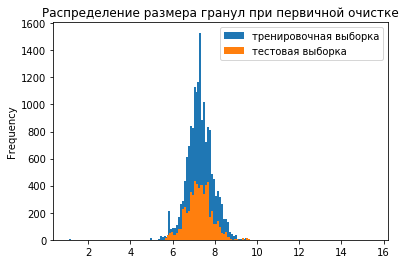

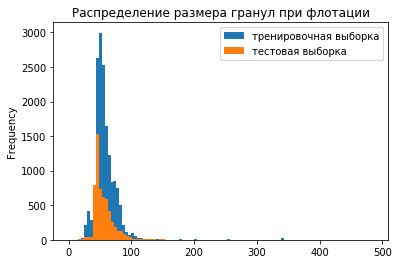

In [8]:
train_feed_sizes = df_train[['primary_cleaner.input.feed_size', 'rougher.input.feed_size']]
test_feed_sizes = df_test[['primary_cleaner.input.feed_size', 'rougher.input.feed_size']]

hist1 = plt.figure()
hist1 = train_feed_sizes['primary_cleaner.input.feed_size'].plot(kind ='hist',title = 'Распределение размера гранул при первичной очистке',label = 'тренировочная выборка', bins = 100)
hist1 = test_feed_sizes['primary_cleaner.input.feed_size'].plot(kind ='hist', bins = 100, label = 'тестовая выборка')
plt.legend()

hist2 = plt.figure()
hist2 = train_feed_sizes['rougher.input.feed_size'].plot(kind ='hist',title = 'Распределение размера гранул при флотации', label = 'тренировочная выборка', bins = 100)
hist2 = test_feed_sizes['rougher.input.feed_size'].plot(kind ='hist', bins = 100, label = 'тестовая выборка')
plt.legend()

plt.show()


Распределения по выборкам для двух этапов похожи. Сделаем двойную проверку на числах.

In [9]:
display(train_feed_sizes.describe(), test_feed_sizes.describe())

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,16860.000000,16443.000000
mean,7.297285,58.676444
std,0.619166,23.922591
min,1.080000,9.659576
25%,6.940000,47.575879
50%,7.285000,54.104257
75%,7.700000,65.051064
max,10.470000,484.967466


,primary_cleaner.input.feed_size,rougher.input.feed_size
count,5856.000000,5834.000000
mean,7.264651,55.937535
std,0.611526,22.724254
min,5.650000,0.046369
25%,6.885625,43.890852
50%,7.259333,50.002004
75%,7.650000,61.638434
max,15.500000,477.445473


Видно, что как для тестовой выборки, так и для тренировочной, средние близки, стандартные отклонения почти не отличаются, квартили очень похожи.

Соберем значения концентраций на полной выборке. При нахождении аномалий рассмотрим по отдельность тестовую и тренировочную.

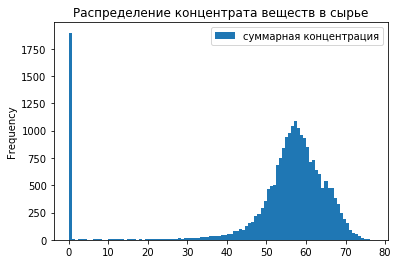

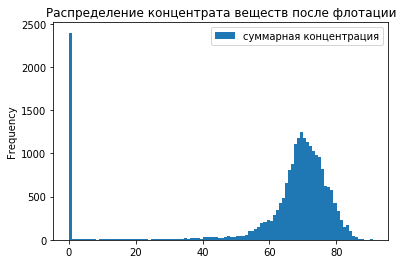

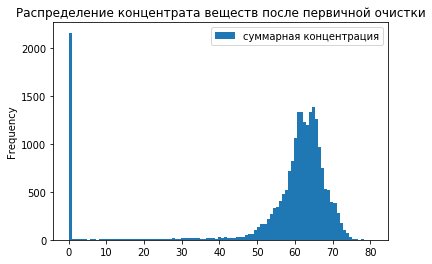

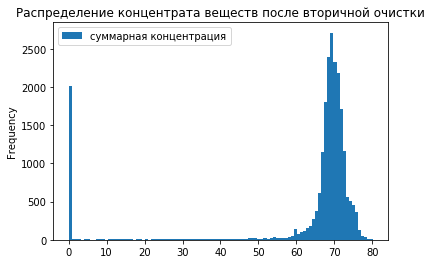

In [10]:
feed_concent = df_full['rougher.input.feed_ag'] +  df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_sol']
rougher_concent = df_full['rougher.output.concentrate_ag'] +  df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']
primary_concent = df_full['primary_cleaner.output.concentrate_ag'] +  df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_sol'] + df_full['primary_cleaner.output.concentrate_au']
final_concent = df_full['final.output.concentrate_ag'] +  df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']


hist3 = plt.figure()
hist3 = feed_concent.plot(kind ='hist',title = 'Распределение концентрата веществ в сырье',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist4 = plt.figure()
hist4 = rougher_concent.plot(kind ='hist',title = 'Распределение концентрата веществ после флотации',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist5 = plt.figure()
hist5 = primary_concent.plot(kind ='hist',title = 'Распределение концентрата веществ после первичной очистки',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist6 = plt.figure()
hist6 = final_concent.plot(kind ='hist',title = 'Распределение концентрата веществ после вторичной очистки',label = 'суммарная концентрация', bins = 100)
plt.legend()
plt.show()

Странным кажется то, что пик гистограммы в финальных значениях концентрата сместился к 70. Хотя, в целом, это логично, ведь концентрация по мере фильтрации должна увеличиваться. Сделаем аналогичные проверки для  тренировочной выборки.

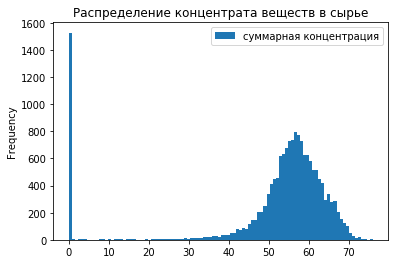

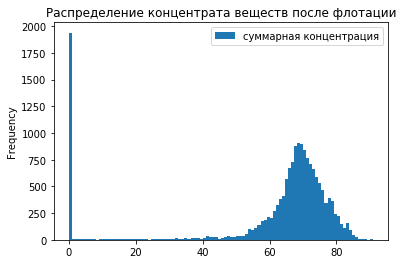

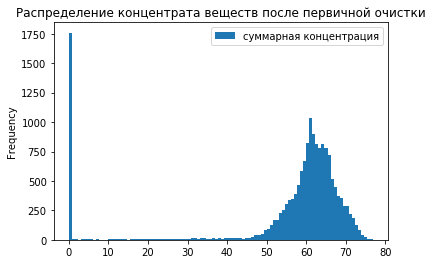

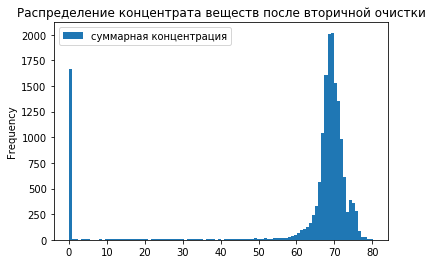

In [11]:
feed_concent_train = df_train['rougher.input.feed_ag'] +  df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_sol']
rougher_concent_train = df_train['rougher.output.concentrate_ag'] +  df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_au']
primary_concent_train = df_train['primary_cleaner.output.concentrate_ag'] +  df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol'] + df_train['primary_cleaner.output.concentrate_au']
final_concent_train = df_train['final.output.concentrate_ag'] +  df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_au']


hist7 = plt.figure()
hist7 = feed_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ в сырье',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist8 = plt.figure()
hist8 = rougher_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ после флотации',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist9 = plt.figure()
hist9 = primary_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ после первичной очистки',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist10 = plt.figure()
hist10 = final_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ после вторичной очистки',label = 'суммарная концентрация', bins = 100)
plt.legend()
plt.show()

Результаты очень похожи на полную выборку. Что для тестовой, что для тренировочной выборки встречаются нулевые значения суммарной концентрации. В целом, это можно принять за аномалии, потому что по техпроцессу руда должна быть золотосодержащей, чтобы было что извлекать. Если концентрации металлов не найдено совсем, то эта руда и не нужна. Удалим значения с нулевой суммарной концентрацией элементов.

In [12]:
df_train['final.output.concentrate_au'].value_counts()

0.000000     1263
0.010000      398
42.417690      19
37.336849      11
44.528214       8
             ... 
44.218390       1
44.100914       1
40.834250       1
44.515789       1
48.495295       1
Name: final.output.concentrate_au, Length: 15081, dtype: int64

<b>Также для всех металлов попадаются синтетические значения концентраций 0.01. </b> Лучше будет удалить и их тоже, вместе с нулями. Как в тестовой, так и в тренировочной выборке.

In [13]:
df_train = df_train[(df_train['rougher.input.feed_ag'] >= 0.01) & (df_train['rougher.input.feed_au']>= 0.01) & (df_train['rougher.input.feed_sol']>= 0.01) & (df_train['rougher.input.feed_pb']>= 0.01)]
df_train = df_train[(df_train['rougher.output.concentrate_au']>= 0.01) & (df_train['rougher.output.concentrate_ag']>= 0.01) & (df_train['rougher.output.concentrate_sol']>= 0.01) & (df_train['rougher.output.concentrate_pb']>= 0.01)]
df_train = df_train[(df_train['primary_cleaner.output.concentrate_ag']>= 0.01) & (df_train['primary_cleaner.output.concentrate_au']>= 0.01) & (df_train['primary_cleaner.output.concentrate_sol']>= 0.01) & (df_train['primary_cleaner.output.concentrate_pb']>= 0.01)]
df_train = df_train[(df_train['final.output.concentrate_ag']>= 0.01) & (df_train['final.output.concentrate_au']>= 0.01) & (df_train['final.output.concentrate_pb']>= 0.01) & (df_train['final.output.concentrate_sol']>= 0.01)]

df_test = df_test[(df_test['rougher.input.feed_ag'] >= 0.01) & (df_test['rougher.input.feed_au']>= 0.01) & (df_test['rougher.input.feed_sol']>= 0.01) & (df_test['rougher.input.feed_pb']>= 0.01)]

Удалим все пропущенные значения в тренировочной выборке для успешной тренировки моделей.

In [14]:
print(df_train.shape)
df_train= df_train.dropna()
print(df_train.shape)

(13613, 88)
(10676, 88)


Посмотрим на распределение значений в тренировочной выборке еще раз, после удаления лишнего:

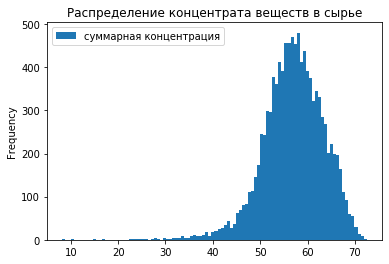

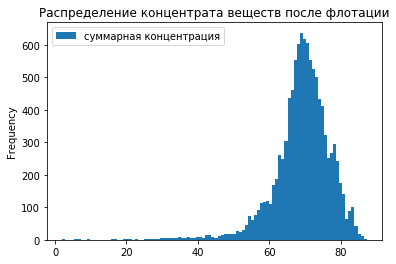

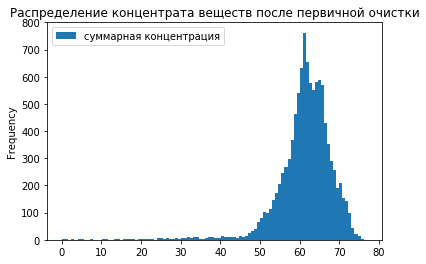

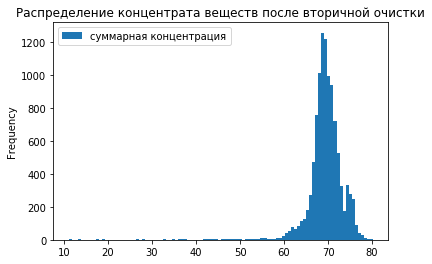

In [15]:
feed_concent_train = df_train['rougher.input.feed_ag'] +  df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_sol']
rougher_concent_train = df_train['rougher.output.concentrate_ag'] +  df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_au']
primary_concent_train = df_train['primary_cleaner.output.concentrate_ag'] +  df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol'] + df_train['primary_cleaner.output.concentrate_au']
final_concent_train = df_train['final.output.concentrate_ag'] +  df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_au']


hist7 = plt.figure()
hist7 = feed_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ в сырье',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist8 = plt.figure()
hist8 = rougher_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ после флотации',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist9 = plt.figure()
hist9 = primary_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ после первичной очистки',label = 'суммарная концентрация', bins = 100)
plt.legend()
hist10 = plt.figure()
hist10 = final_concent_train.plot(kind ='hist',title = 'Распределение концентрата веществ после вторичной очистки',label = 'суммарная концентрация', bins = 100)
plt.legend()
plt.show()

Нерелевантные значения удалены. Перейдем к моделированию.

<b> Вывод: </b>
<br>
По мере прохождения этапов очистки суммарная концентрация элементов сильнее собирается у значений 70 вместо ~60 на этапе получения сырья (что обусловлено техпроцессом), при этом разброс значений уменьшается, хвосты распределения становятся менее тяжелыми.


## Модель

Напишем функцию расчета итоговой sMAPE исходя из данных формул. В функции также сброшены индексы столбца таргетов для корректных операций вычитания и сложения колонок. Первая колонка в датафреймах прогноза и таргета относится к recovery на этапе флотации, вторая - к recovery в финале.

In [16]:
def smape(target, prediction):
    prediction = pd.DataFrame(data = prediction, columns = ['rougher.output.recovery.pred', 'final.output.recovery.pred'])
    target.reset_index(drop = True, inplace = True)
    enum_rough = (abs(target[target.columns[0]] - prediction[prediction.columns[0]]))
    denom_rough = ((abs(target[target.columns[0]]) + abs(prediction[prediction.columns[0]]))/2)
    enum_final = (abs(target[target.columns[1]] - prediction[prediction.columns[1]]))
    denom_final = ((abs(target[target.columns[1]]) + abs(prediction[prediction.columns[1]]))/2)
    smape_rough = ((enum_rough / denom_rough).sum())/len(enum_rough) * 100
    smape_final = ((enum_final / denom_final).sum())/len(enum_final) * 100
    return smape_rough * 0.25 + smape_final * 0.75

In [25]:
#print(df_full[(df_test.columns)])
df_full.set_index('date')
df_test.set_index('date')
df_train.set_index('date')
df_test['rougher.output.recovery'] = df_full.loc[df_test.index,'rougher.output.recovery']
df_test['final.output.recovery'] = df_full.loc[df_test.index,'final.output.recovery']
df_train = df_train[(df_test.columns)]
df_test = df_test.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)

In [18]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis = 1)
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

In [19]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(features_train, target_train)
result_tree =  cross_val_score(model, features_train, target_train, cv = 5, scoring = 'r2')
print('R2 на кросс-валидации:', pd.Series(result_tree).mean())

R2 на кросс-валидации: -1.707561753297658


In [20]:
model = LinearRegression()
model.fit(features_train, target_train)
result_regression =  cross_val_score(model, features_train, target_train, cv = 5)
print('R2 на кросс-валидации:',pd.Series(result_regression).mean())

R2 на кросс-валидации: -0.27797330789399044


In [21]:
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 11)
model.fit(features_train, target_train)
result_forest = cross_val_score(model, features_train, target_train, cv = 5)
print('R2 на кросс-валидации:',pd.Series(result_forest).mean())

R2 на кросс-валидации: -0.1843466836656103


В целом, из-за малого количества релевантных переменных модели не отличаются качеством. Немного лучше остальных показала себя модель случайного леса. Линейная регрессия также близка по показателю R2. Хуже всего показала себя модель решающего дерева.

Проверим данные на тестовой выборке, предварительно вытянув данные из общей выборки по датам для получения значений целевых переменных.

In [22]:
#df_test_new = df_full.merge(df_test, on='date', how='inner', suffixes=('_left', ''))
#df_test_new = df_test_new[df_test_new.columns[87:], 'rougher.output.recovery_left', 'final.output.recovery_left']
#print(df_test_new)
#df_test_new= df_test_new.dropna()
df_test= df_test.dropna()

In [23]:
features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]
prediction = model.predict(features_test) 

In [24]:
print('RMSE:', mean_squared_error(target_test, prediction)**0.5)
print('R2:', r2_score(target_test, prediction))
print('MAE:', mean_absolute_error(target_test, prediction))
print('sMAPE:',"{0:.2f}%".format(smape(target_test, prediction )))

RMSE: 13.62448182355689
R2: -0.2544312258841266
MAE: 8.12000150726871
sMAPE: 12.32%


Отработка модели на тестовой выборке удовлетворительная. sMAPE чуть более12%, MAE чуть больше 8 - данные прогнозируются достаточно точно. Модель допустима к применению в продакшене.